# DIABETES PREDICTION USING LOGISITIC REGRESSION AND SUPPORT VECTOR MACHINE

In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request as rq
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("D:\DATASETS/diabetes.csv")
pd.set_option("display.max_rows",10)


## DATA PREPROCESSING AND CLEANING

In [3]:
df.isna().sum()    #No NaN values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df = df.replace(' ', np.nan)  # to get rid of empty values

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**We can see that there is a wide range of values in BloodPressure, BMI, Insulin, Age so it would be a good idea to normalize these features later on before building a model**

In [6]:
df.corr()   #checking for correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**From the above correlation dataframe, it shows that blood pressure, skin thickness, insulin, and DiabetesPedigreeFunction are not good predictors of the outcome variable. We will first test our model using only the highly correlated features, and then run the model with all of the features and compare the accuracies and F1-scores.**

In [7]:
high_features=["Pregnancies", "Glucose", "BMI", "Age", "BloodPressure"]   #features with a high correlation with the outcome variable
all_features=[df.columns]

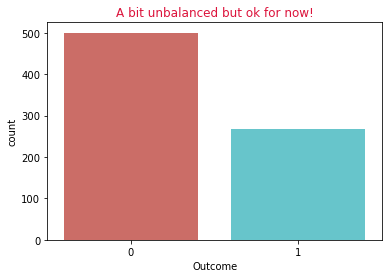

In [8]:
sns.countplot(x=df["Outcome"], palette="hls");  #checking for balanced exxamples in dataset
plt.title("A bit unbalanced but ok for now!", color = "crimson");

In [9]:
sum = df['Outcome'].value_counts()
pos_percent = (sum[0] / (sum[0]+sum[1]))*100
neg_percent = (sum[1] / (sum[0]+sum[1]))*100
print(f"The percentage of positive examples are {pos_percent}% and that of negative examples is {neg_percent}%.")

The percentage of positive examples are 65.10416666666666% and that of negative examples is 34.89583333333333%.


## FREQUENCY DISTRIBUTIONS

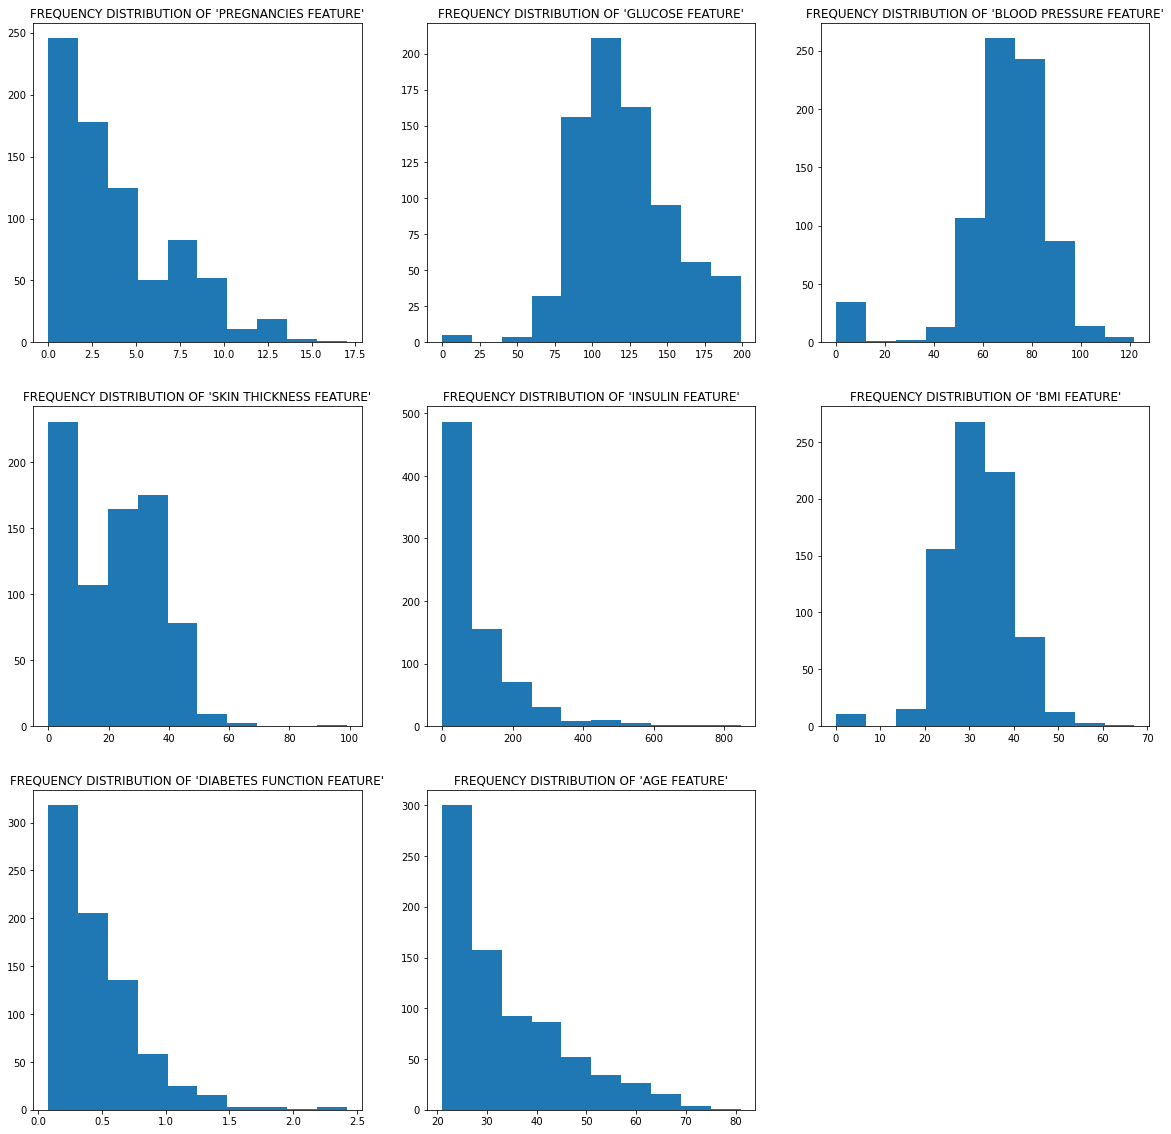

In [10]:
l = list(df.columns)
f = plt.figure(figsize=(20,20))

plt.subplot(3, 3, 1)
plt.hist(df[l[0]])
plt.title("FREQUENCY DISTRIBUTION OF 'PREGNANCIES FEATURE'")

plt.subplot(3, 3, 2)
plt.hist(df[l[1]])
plt.title("FREQUENCY DISTRIBUTION OF 'GLUCOSE FEATURE'")


plt.subplot(3, 3, 3)
plt.hist(df[l[2]])
plt.title("FREQUENCY DISTRIBUTION OF 'BLOOD PRESSURE FEATURE'")


plt.subplot(3, 3, 4)
plt.hist(df[l[3]])
plt.title("FREQUENCY DISTRIBUTION OF 'SKIN THICKNESS FEATURE'")

plt.subplot(3, 3, 5)
plt.hist(df[l[4]])
plt.title("FREQUENCY DISTRIBUTION OF 'INSULIN FEATURE'")


plt.subplot(3, 3, 6)
plt.hist(df[l[5]])
plt.title("FREQUENCY DISTRIBUTION OF 'BMI FEATURE'")

plt.subplot(3, 3, 7)
plt.hist(df[l[6]])
plt.title("FREQUENCY DISTRIBUTION OF 'DIABETES FUNCTION FEATURE'")

plt.subplot(3, 3, 8)
plt.hist(df[l[7]])
plt.title("FREQUENCY DISTRIBUTION OF 'AGE FEATURE'");







## DEEP-DIVE INTO THE AGE FEATURE

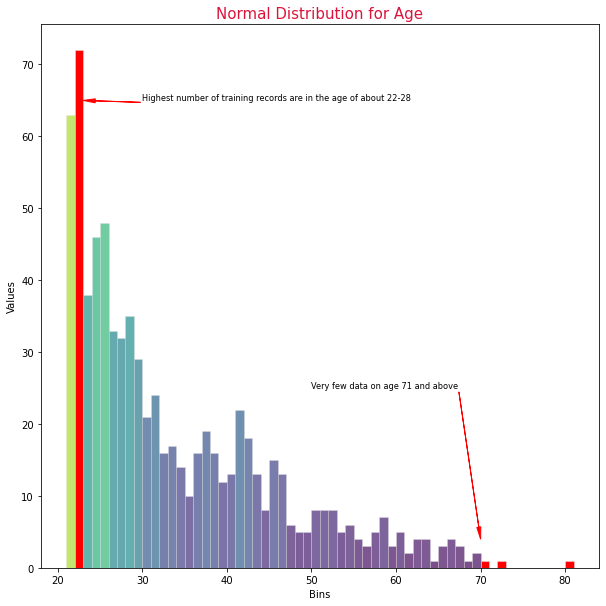

In [11]:
f = plt.figure(figsize=(10,10))

n, bins, patches = plt.hist(df[l[7]], bins=60, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)


n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
# Make one bin stand out   
patches[1].set_fc('red') # Set color
patches[1].set_alpha(1) # Set opacity

patches[49].set_fc('red') # Set color
patches[49].set_alpha(1) # Set opacity

patches[51].set_fc('red') # Set color
patches[51].set_alpha(1) # Set opacity

patches[59].set_fc('red') # Set color
patches[59].set_alpha(1) # Set opacity


# Add annotation

plt.annotate('Highest number of training records are in the age of about 22-28', xy=(23, 65), xytext=(30, 65), fontsize=8.2, arrowprops={'width':0.1,'headwidth':4,'color':'red'})

plt.annotate('Very few data on age 71 and above', xy=(70, 4), xytext=(50, 25), fontsize=8.2, arrowprops={'width':0.1,'headwidth':4,'color':'red'})


plt.title('Normal Distribution for Age', fontsize=15, color = "crimson")
plt.xlabel('Bins', fontsize=10)
plt.ylabel('Values', fontsize=10)
plt.show()

In [12]:
bins = np.linspace(min(df["Age"]), max(df["Age"]), 4)
group_names = ['Young', 'Middle', 'Old']
df['age-binned'] = pd.cut(df['Age'], bins, labels=group_names, include_lowest=True )


In [13]:
df['age-binned'].value_counts()

Young     596
Middle    147
Old        25
Name: age-binned, dtype: int64

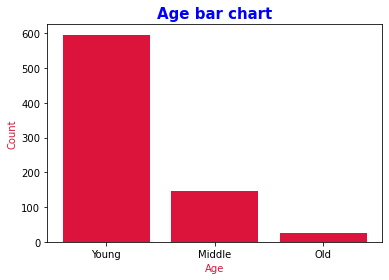

In [14]:
plt.bar(group_names, df["age-binned"].value_counts(), color= "crimson")
plt.xlabel("Age", color = "crimson")
plt.ylabel("Count", color ="crimson")
plt.title("Age bar chart", color = "blue", fontsize=15, fontweight= "bold");

**It seems that most of the people in the dataset are young while there is a low percentage of old population.**

## FEATURE NORMALIZATION AND EXTRACTION

In [15]:
new_df = df.copy()
new_df['Glucose'] = new_df['Glucose']/new_df['Glucose'].max()
new_df['BMI'] = new_df['BMI']/new_df['BMI'].max()
new_df['Age'] = new_df['Age']/new_df['Age'].max()
new_df['Insulin'] = new_df['Insulin']/new_df['Insulin'].max()
new_df['BloodPressure'] = new_df['BloodPressure']/new_df['BloodPressure'].max()



In [16]:
new_df.drop(columns = ['SkinThickness', 'age-binned'], inplace=True)


## LOGISITIC REGRESSION MODEL (ON NORMALIZED FEATURES)

In [28]:
xx = np.array(new_df.iloc[:, :7].values)
yy = np.array(new_df.iloc[:, 7].values)


In [29]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(xx, yy, test_size=0.20, random_state=42)

In [30]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [31]:
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("F1-Score:",(2*metrics.recall_score(y_test, y_pred)*metrics.precision_score(y_test, y_pred))/(metrics.recall_score(y_test, y_pred)+metrics.precision_score(y_test, y_pred)))

print('The R-square is: ', model1.score(x_test, y_test))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('The mean square error of price and predicted value is: ', mse)

Precision: 0.7906976744186046
Recall: 0.6181818181818182
Accuracy: 0.8051948051948052
F1-Score: 0.693877551020408
The R-square is:  0.8051948051948052
The mean square error of price and predicted value is:  0.19480519480519481


C:\Users\moaaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\moaaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


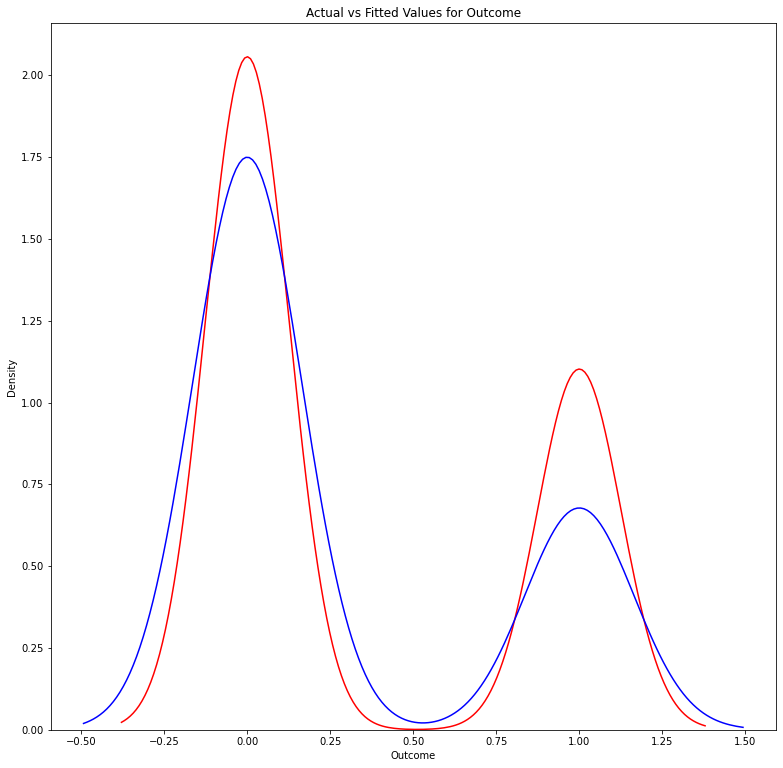

In [61]:
plt.figure(figsize=(13, 13))


ax1 = sns.distplot(new_df['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Outcome');
  #SAME HERE, ALL I KNOW IS THAT TWO CURVES, ONE IS OF ACTUAL VALUE, SECOND IS OF PREDICTED VALUE FROM MY MODEL



## LOGISITIC REGRESSION MODEL (ON RAW DATA WITHOUT NORMALIZATION OR FEATURE SELECTION)

**This is a much worse performance, it goes to show how much important it is to normalize and extract important features only.**

In [64]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(df.iloc[:, :8].values, df.iloc[:, 8].values, test_size=0.20, random_state=42)
model2 = LogisticRegression()
model2.fit(X_TRAIN, Y_TRAIN)
y_predict = model2.predict(X_TEST)
score2 = model2.score(X_TEST, Y_TEST)



C:\Users\moaaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
print("Precision:",metrics.precision_score(Y_TEST, y_predict))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_TEST, y_predict))

print("Accuracy:",metrics.accuracy_score(Y_TEST, y_predict))

print("F1-Score:",(2*metrics.recall_score(Y_TEST, y_predict)*metrics.precision_score(Y_TEST, y_predict))/(metrics.recall_score(Y_TEST, y_predict)+metrics.precision_score(Y_TEST, y_predict)))

print('The R-square is: ', model2.score(X_TEST, Y_TEST))

from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(Y_TEST, y_predict)
print('The mean square error of price and predicted value is: ', mse2)

Precision: 0.6379310344827587
Recall: 0.6727272727272727
Accuracy: 0.7467532467532467
F1-Score: 0.6548672566371682
The R-square is:  0.7467532467532467
The mean square error of price and predicted value is:  0.2532467532467532


## SVM (ON NORMALIZED FEATURES)

In [40]:
x_train1, x_test1, y_train1, y_test1 = sklearn.model_selection.train_test_split(xx, yy, test_size=0.25, random_state=42)
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(x_train1, y_train1)
y_pred1 = clf.predict(x_test1)

In [68]:
print("Precision:",metrics.precision_score(y_test1, y_pred1))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test1, y_pred1))

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

print("F1-Score:",(2*metrics.recall_score(y_test1, y_pred1)*metrics.precision_score(y_test1, y_pred1))/(metrics.recall_score(y_test1, y_pred1)+metrics.precision_score(y_test1, y_pred1)))

print('The R-square is: ', clf.score(x_test1, y_test1))

from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_test1, y_pred1)
print('The mean square error of price and predicted value is: ', mse3)

Precision: 0.6612903225806451
Recall: 0.5942028985507246
Accuracy: 0.7447916666666666
F1-Score: 0.6259541984732824
The R-square is:  0.7447916666666666
The mean square error of price and predicted value is:  0.2552083333333333


**Logistic regression with normalized features gives the highest accuracy while SVM performs poorly with the normalized features. Furthermore, training a model with unnormalized features gives a much worse performance. Comparing logistic regression with normalized features and SVM with unnormalized features, the former perform a bit better that the latter. Concluding that logistic regression is much suited for the given dataset**